In [3]:
import pandas as pd
import os
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve, roc_curve, confusion_matrix
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_json('/root/SonificationProject/Experiments/EfficientNetB7_on_Results/EfficientNetB7_0_perfs.json')
df

,name,y_true,y_pred,y_scores,mode,prevalence
0,cortelcophone_003_copy.png,0,0,2.424000e-07,Sonification EfficientNetB7,9.5
1,cortelcophone_011_copy.png,0,0,2.747000e-07,Sonification EfficientNetB7,9.5
2,cortelcophone_012.png,0,0,3.550000e-08,Sonification EfficientNetB7,9.5
3,cortelcophone_015_copy.png,0,0,8.500000e-09,Sonification EfficientNetB7,9.5
4,cortelcophone_016.png,0,0,7.918000e-07,Sonification EfficientNetB7,9.5
...,...,...,...,...,...,...
3595,xboxone_592.png,19,19,1.812000e-07,Sonification EfficientNetB7,9.5
3596,xboxone_593_copy.png,19,19,8.190000e-08,Sonification EfficientNetB7,9.5
3597,xboxone_596.png,19,19,8.370000e-08,Sonification EfficientNetB7,9.5
3598,xboxone_599.png,19,19,5.320000e-07,Sonification EfficientNetB7,9.5


In [5]:
classes = dict()
for root, dirs, files in os.walk('/root/SonificationProject/Data/New_Data_s'):
    for i, name in enumerate(dirs):
        classes[i] = name
classes

{0: 'viziobluray',
 1: 'viewsonicmonitor',
 2: 'delloptiplex',
 3: 'roku2xs',
 4: 'odroidxu4',
 5: 'vtechvsmile',
 6: 'cyberpowerups',
 7: 'linksysrouter',
 8: 'dellmonitor',
 9: 'dellxps',
 10: 'usrpe310',
 11: 'fluorescentlights',
 12: 'polycomvoip',
 13: 'cortelcophone',
 14: 'raspberrypi',
 15: 'hpzbook',
 16: 'wiiu',
 17: 'hplaserjet',
 18: 'lgphone',
 19: 'xboxone'}

In [6]:
y = df['y_true']
y = y.astype(np.uint8)
n_classes = len(set(y))

Y = label_binarize(y, classes=[*range(n_classes)])

preds = np.array([])
for i in range(n_classes):
    preds = np.append(preds, df['y_pred'] == i)
preds = preds.reshape(n_classes, -1).T
Y.shape, preds.shape


((3600, 20), (3600, 20))

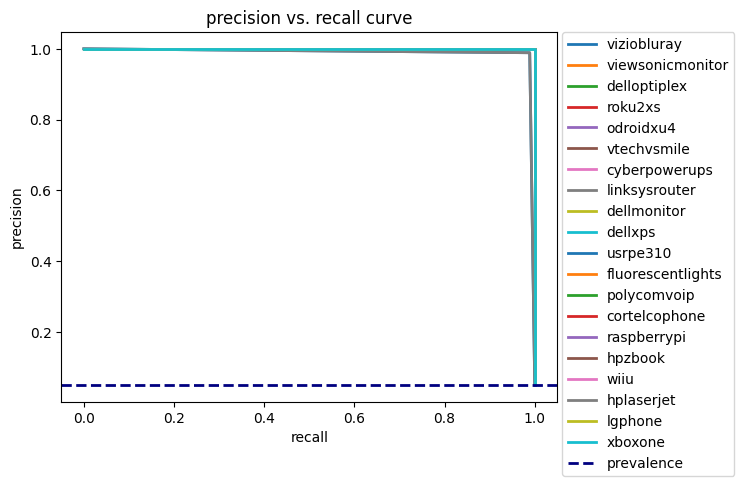

In [7]:
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y[:, i],
                                                        preds[:, i])
    plt.plot(recall[i], precision[i], lw=2, label=f'{classes[i]}')
    
prevalence=precision[0][0]
plt.axhline(y=prevalence, color='navy', lw=2, linestyle='--', label='prevalence')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
plt.title("precision vs. recall curve")
plt.show()

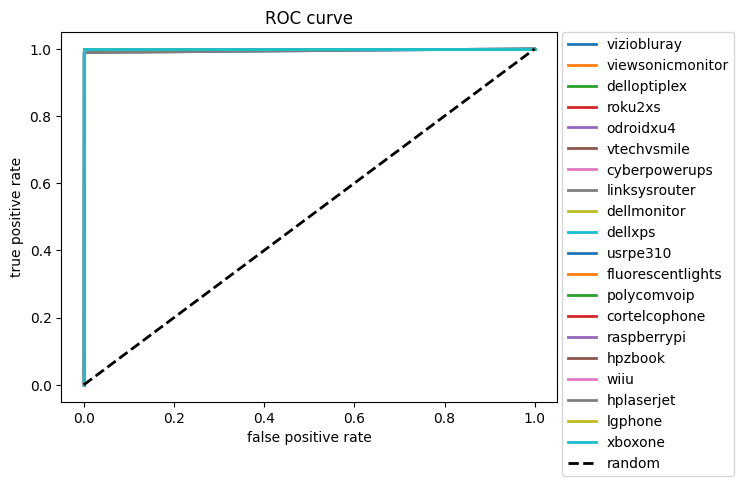

In [8]:
# roc curve
fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y[:, i],
                                  preds[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label=f'{classes[i]}')

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='random')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
plt.title("ROC curve")
plt.show()

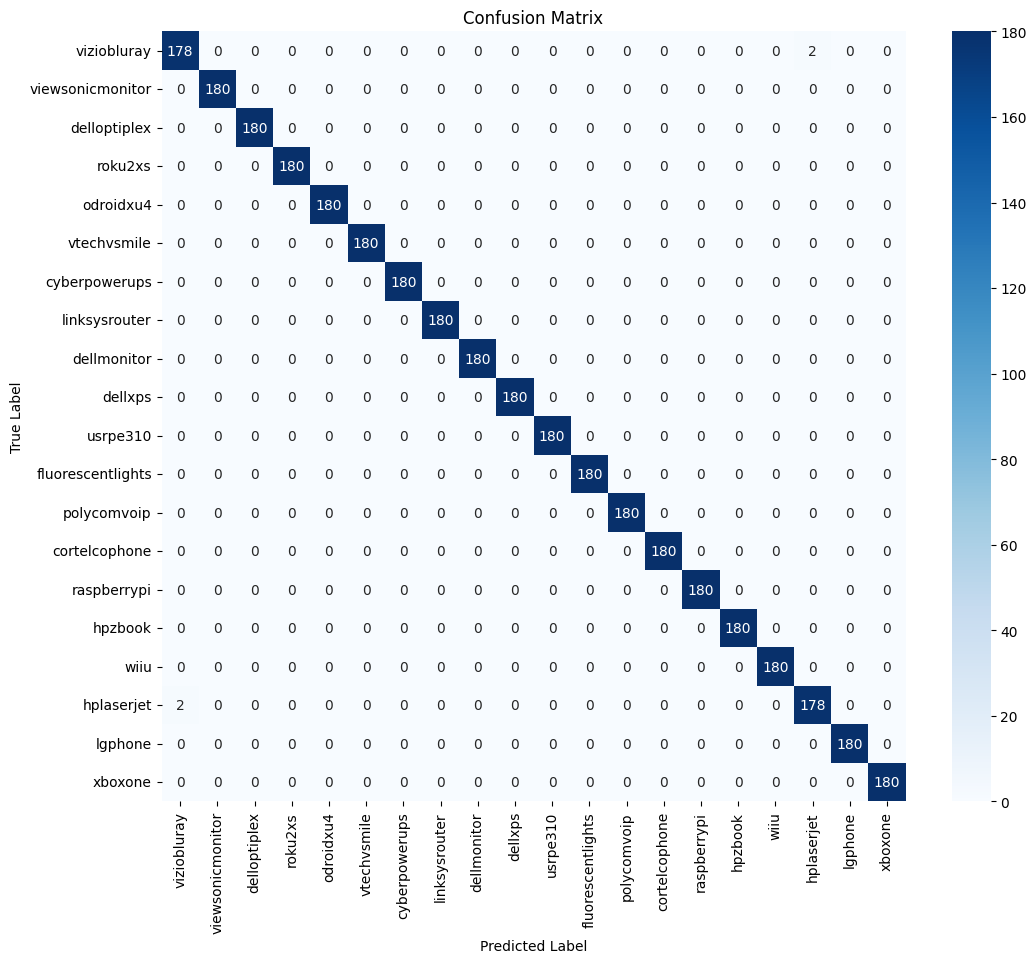

In [9]:
confusion_matrix_data = np.zeros((n_classes, n_classes))
for i in range(n_classes):
    for j in range(n_classes):
        confusion_matrix_data[i, j] = np.sum(np.logical_and(preds[:, i], Y[:, j]))
# Normalize the confusion matrix to percentages
# (optional, you can remove this step if not needed)
confusion_matrix_data = confusion_matrix_data.T

# Define the class labels (optional, you can adjust these according to your problem)
class_labels = [f"{classes[i]}" for i in range(n_classes)]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(confusion_matrix_data, annot=True, cmap='Blues', fmt='.0f', xticklabels=class_labels, yticklabels=class_labels, ax=ax)

# Set axis labels and title
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

# Show the plot
plt.savefig('confusion_matrix.png')
plt.show()